# Halo model

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy import interpolate
from compos import const
from MgIIabs.model import halomodel as hmod, halomassfunc as hmf
import matplotlib.pyplot as plt
from astropy import units as u, constants as cons
from astropy.cosmology import Planck13

In [2]:
M = 10**np.linspace(10,16)*u.astrophys.M_sun

## $R_g$ as a function of $M$ 

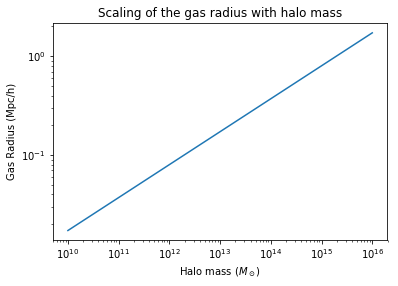

In [3]:
Rg = hmod.rg(M)
plt.loglog(M,Rg)
plt.xlabel('Halo mass ($M_\odot$)')
plt.ylabel('Gas Radius (Mpc/h)')
plt.title('Scaling of the gas radius with halo mass')
plt.show()

## $W_r(s)$

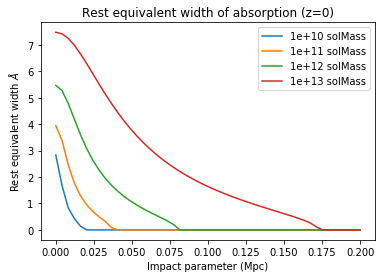

In [4]:
s = np.linspace(0,0.2)*u.astrophys.Mpc
masses = 10**np.arange(start = 10,stop=14)*u.astrophys.M_sun
rew = [[hmod.rew_of_s(b,M,A_w0=13.0423002*u.nm*(u.cm)**2/u.g).value*10 for b in s] for  M in masses]
import pdb
plots = []
for index, M in enumerate(masses):
    plots.append(plt.plot(s.value,rew[index],label=r'{:1.0e}'.format(M))[0])
plt.legend(handles=plots)
plt.xlabel('Impact parameter (Mpc)')
plt.ylabel('Rest equivalent width $\AA$')
plt.title('Rest equivalent width of absorption (z=0)')
plt.show()

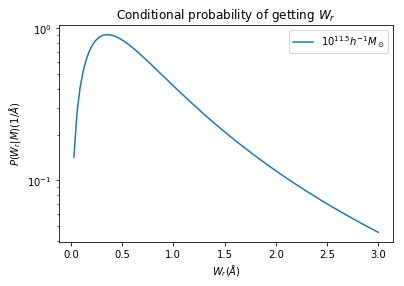

In [5]:
M = 10**11.5*u.astrophys.M_sun
w = np.linspace(0,0.3,100)*u.nm
p = [hmod.p_rew_given_m(rew,M).value/hmod.kappa_g(M)/10 for rew in w]
plt.semilogy(w.value*10,p,label="$10^{11.5}h^{-1}M_\odot$")
plt.legend()
plt.xlabel(r'$W_r (\AA)$')
plt.ylabel(r'$P(W_r|M) (1/\AA)$')
plt.title('Conditional probability of getting $W_r$')
plt.show()

In [6]:
hmod.p_rew_given_m(0.31*u.nm,M)

<Quantity [ 0.38580889] 1 / nm>

To check if the obtained REW vs impact parameter relation is correct, I find out the value of the REW at $R_g/2$ for a $10^{12}M_\odot$ halo. This should give me 0.15 nm according to Tinker and Chen 2008. 

In [9]:
mass = 10**12*u.astrophys.Msun
Rg = hmod.rg(mass)
s = Rg/2
hmod.rew_of_s(s=s,z=0,M=mass)

<Quantity [ 0.15] nm>